<a href="https://colab.research.google.com/github/GarvinAgweli/personal/blob/main/loan_approval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#STEP_1:DATA LOADING
# import all the required libraries and dependencies for dataframe

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime, timedelta

# import all the required libraries and dependencies for machine learning

from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold,GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score,classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics
import statsmodels.api as sm
import pickle
import gc
from sklearn import svm
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve,roc_auc_score, precision_recall_curve, average_precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
df=pd.read_csv('loan_data.csv')

In [ ]:
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [ ]:
df.shape

(45000, 14)

In [ ]:
df.columns

Index(['person_age', 'person_gender', 'person_education', 'person_income',
       'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_intent',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score', 'previous_loan_defaults_on_file', 'loan_status'],
      dtype='object')

In [ ]:
df.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [ ]:
display(df)

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1
44996,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No,1
44997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1
44998,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1


In [ ]:
df.dtypes

,0
person_age,float64
person_gender,object
person_education,object
person_income,float64
person_emp_exp,int64
person_home_ownership,object
loan_amnt,float64
loan_intent,object
loan_int_rate,float64
loan_percent_income,float64


In [ ]:
df['person_gender'].value_counts()

,count
person_gender,
male,24841
female,20159


In [ ]:
df['person_education'].value_counts()

,count
person_education,
Bachelor,13399
Associate,12028
High School,11972
Master,6980
Doctorate,621


In [ ]:
df['person_home_ownership'].value_counts()

,count
person_home_ownership,
RENT,23443
MORTGAGE,18489
OWN,2951
OTHER,117


In [ ]:
df['loan_intent'].value_counts()

,count
loan_intent,
EDUCATION,9153
MEDICAL,8548
VENTURE,7819
PERSONAL,7552
DEBTCONSOLIDATION,7145
HOMEIMPROVEMENT,4783


In [ ]:
df['previous_loan_defaults_on_file'].value_counts()

,count
previous_loan_defaults_on_file,
Yes,22858
No,22142


In [ ]:
df['person_age'].value_counts()

,count
person_age,
23.0,5254
24.0,5138
25.0,4507
22.0,4236
26.0,3659
27.0,3095
28.0,2728
29.0,2455
30.0,2021


In [ ]:
# Identify categorical columns
cat_cols = df.select_dtypes(include='object').columns.tolist()
print(cat_cols)

['person_gender', 'person_education', 'person_home_ownership', 'loan_intent', 'previous_loan_defaults_on_file']


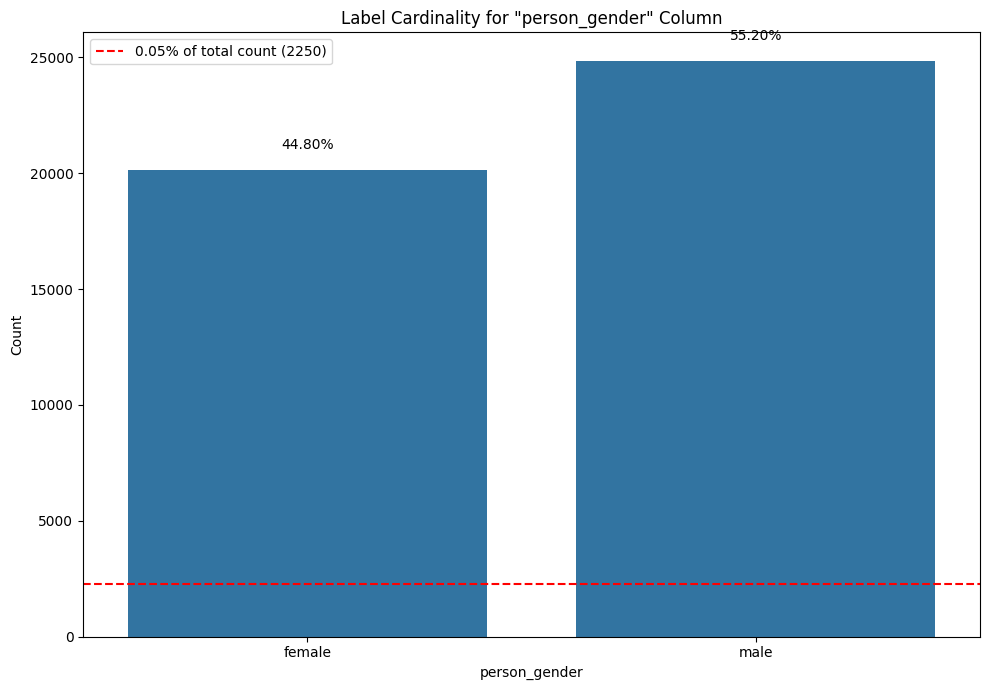

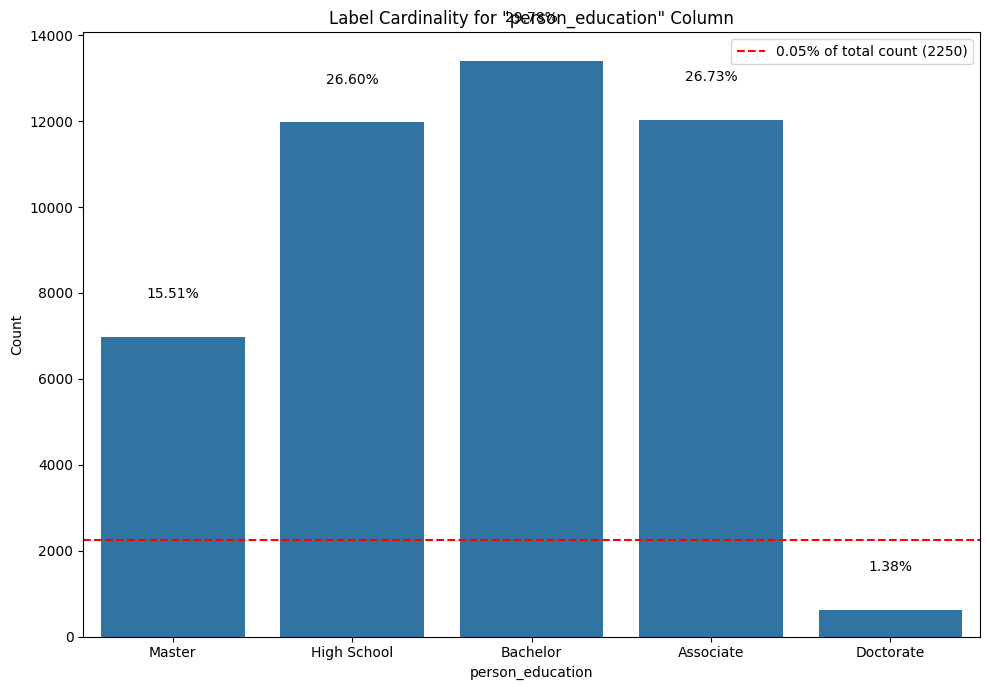

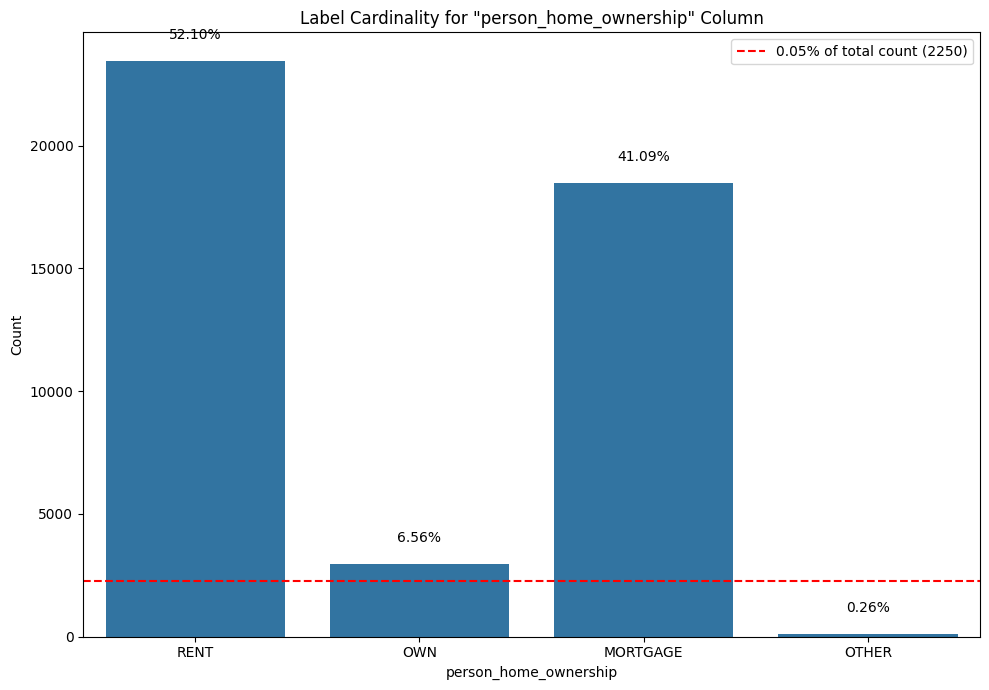

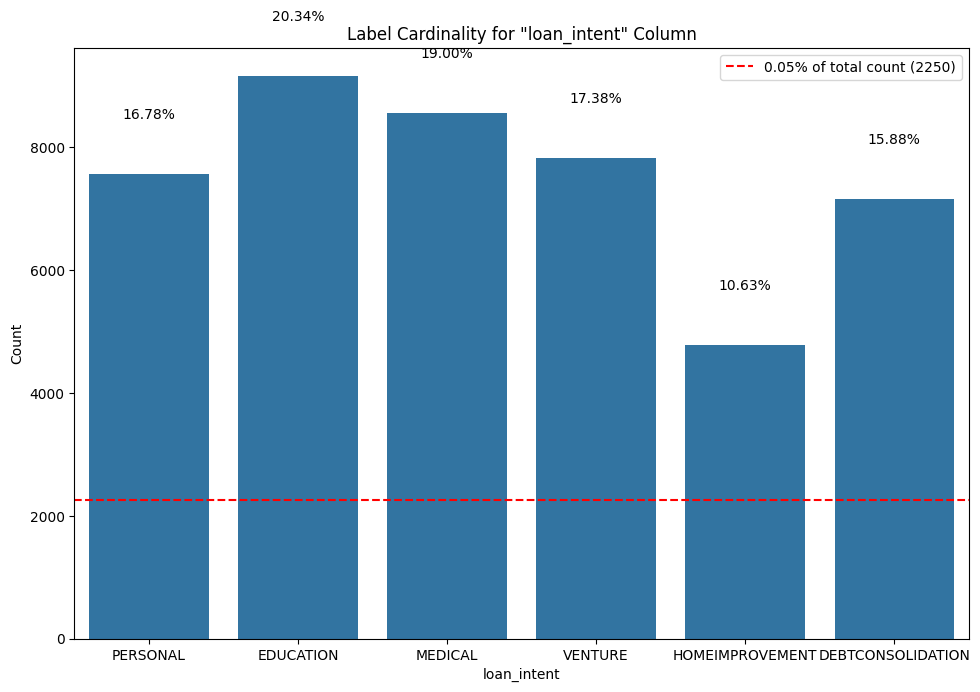

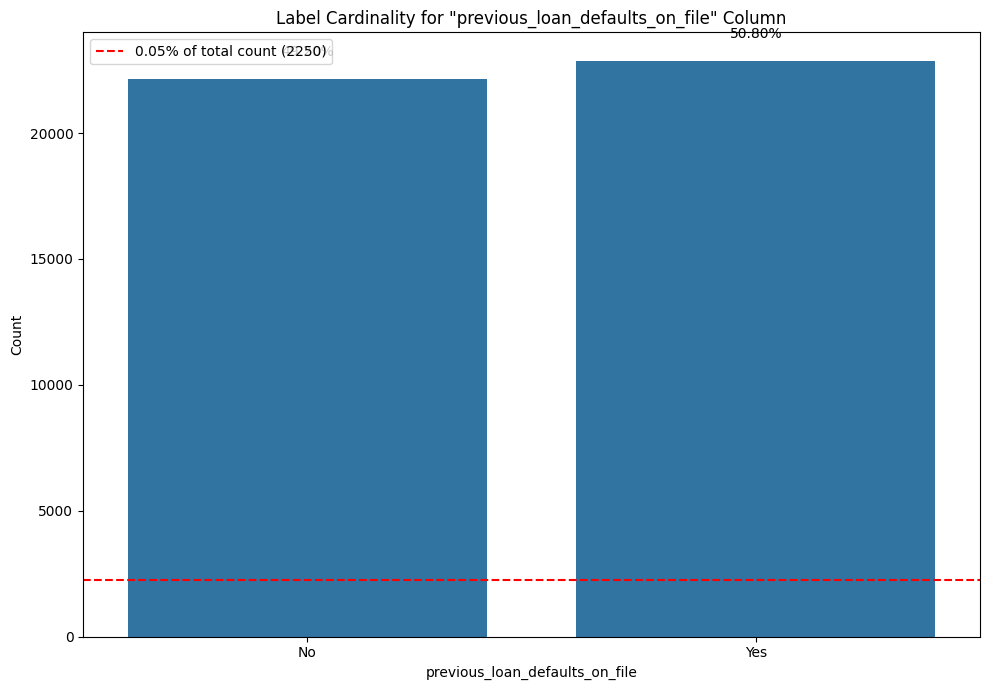

In [ ]:
def plot_categorical_column(dataframe, column):

    plt.figure(figsize=(10, 7))
    ax = sns.countplot(x=dataframe[column])
    total_count = len(dataframe[column])
    threshold = 0.05 * total_count
    category_counts = dataframe[column].value_counts(normalize=True) * 100
    ax.axhline(threshold, color='red', linestyle='--', label=f'0.05% of total count ({threshold:.0f})')

    for p in ax.patches:
        height = p.get_height()
        percentage = (height / total_count) * 100
        ax.text(p.get_x() + p.get_width() / 2., height + 0.02 * total_count, f'{percentage:.2f}%', ha="center")

    plt.title(f'Label Cardinality for "{column}" Column')
    plt.ylabel('Count')
    plt.xlabel(column)
    plt.tight_layout()

    plt.legend()
    plt.show()

for col in cat_cols:
    plot_categorical_column(df, col)

array([[<Axes: title={'center': 'person_age'}>,
        <Axes: title={'center': 'person_income'}>,
        <Axes: title={'center': 'person_emp_exp'}>],
       [<Axes: title={'center': 'loan_amnt'}>,
        <Axes: title={'center': 'loan_int_rate'}>,
        <Axes: title={'center': 'loan_percent_income'}>],
       [<Axes: title={'center': 'cb_person_cred_hist_length'}>,
        <Axes: title={'center': 'credit_score'}>,
        <Axes: title={'center': 'loan_status'}>]], dtype=object)

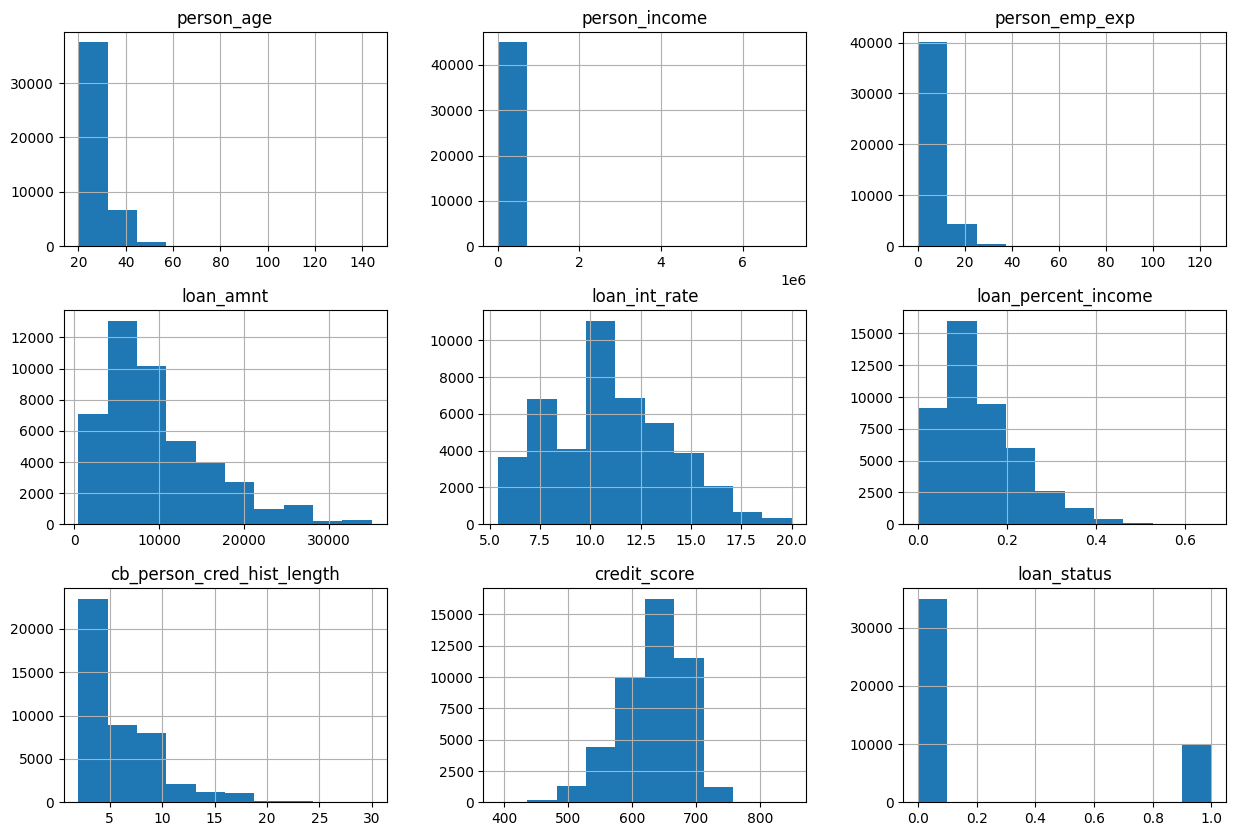

In [ ]:
df.hist(figsize=(15,10))

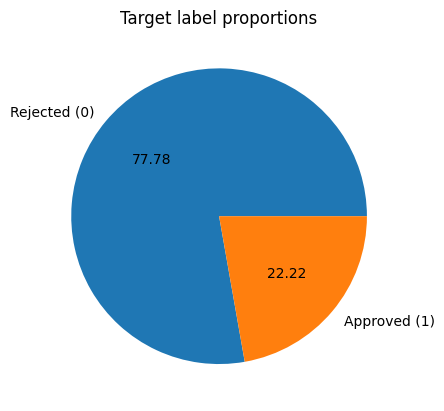

In [ ]:
label_prop = df['loan_status'].value_counts()

plt.pie(label_prop.values, labels=['Rejected (0)', 'Approved (1)'], autopct='%.2f')
plt.title('Target label proportions')
plt.show()

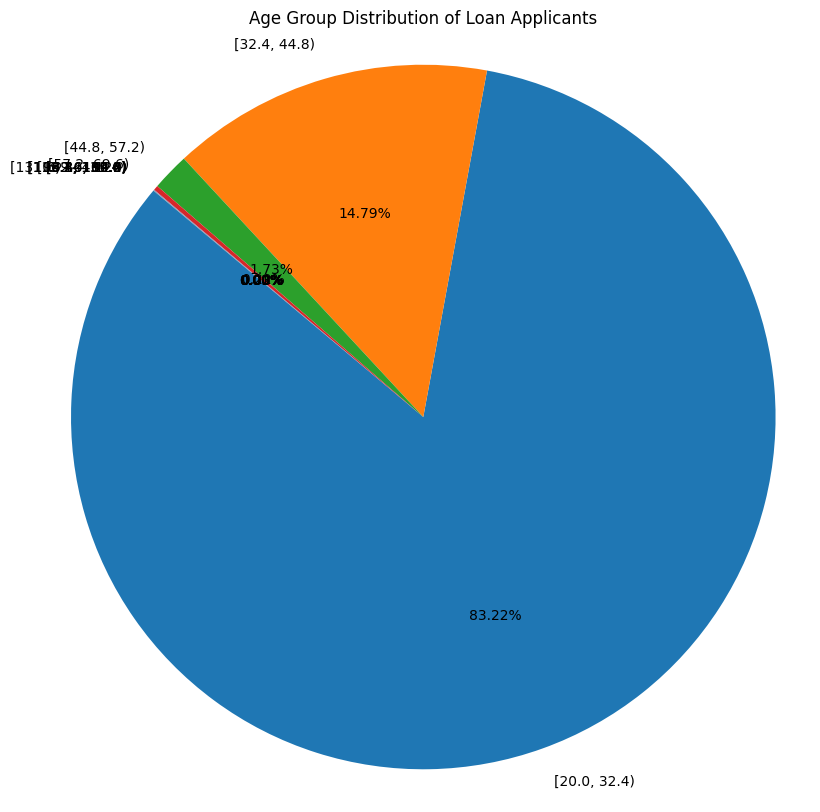

In [ ]:
# Categorize 'person_age' into bins
df['person_age_group'] = pd.cut(df['person_age'], bins=10, right=False)

# Count age group frequencies
age_group_counts = df['person_age_group'].value_counts().sort_index()

# Plot pie chart
plt.figure(figsize=(10,10))
plt.pie(age_group_counts, labels=age_group_counts.index, autopct='%2.2f%%', startangle=140)
plt.title('Age Group Distribution of Loan Applicants')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [ ]:
# Identify numerical columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Remove the target column if it's in the numerical columns
if 'loan_status' in num_cols:
    num_cols.remove('loan_status')

print(num_cols)

['person_age', 'person_income', 'person_emp_exp', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score']


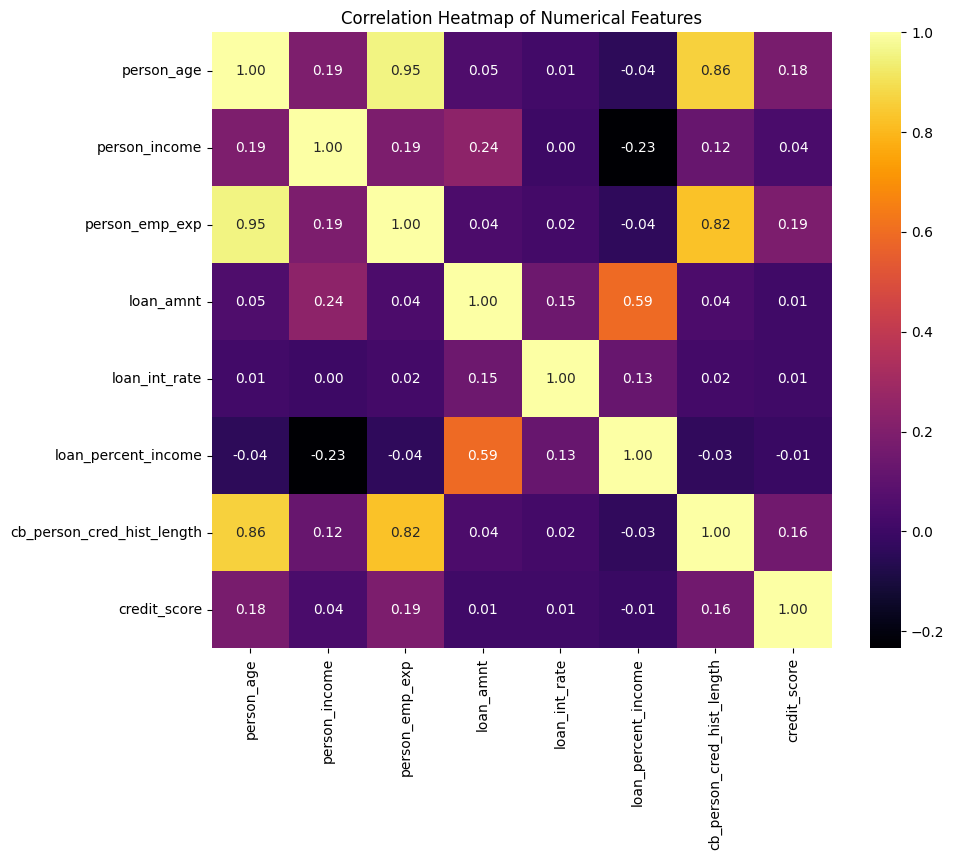

In [ ]:
# Calculate the correlation matrix for numerical columns
correlation_matrix = df[num_cols].corr()

# Generate a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='inferno', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

In [ ]:
# Define features (X) and target (y)
X = df.drop('loan_status', axis=1)
y = df['loan_status']

In [ ]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [ ]:
X_train.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,person_age_group
30159,38.0,male,Associate,41579.0,14,RENT,5750.0,MEDICAL,11.01,0.14,16.0,647,Yes,"[32.4, 44.8)"
6777,24.0,female,Associate,28052.0,3,RENT,7000.0,DEBTCONSOLIDATION,10.62,0.25,3.0,649,No,"[20.0, 32.4)"
36563,28.0,female,Associate,63722.0,4,MORTGAGE,7000.0,EDUCATION,16.26,0.11,5.0,626,Yes,"[20.0, 32.4)"
11784,26.0,male,Associate,91870.0,3,MORTGAGE,1200.0,PERSONAL,10.25,0.01,2.0,662,No,"[20.0, 32.4)"
10370,22.0,male,Master,29550.0,0,RENT,10000.0,DEBTCONSOLIDATION,11.01,0.34,3.0,633,No,"[20.0, 32.4)"


In [ ]:
y_train.head()

,loan_status
30159,0
6777,1
36563,0
11784,0
10370,1


In [ ]:
# Identify categorical columns and the age group column
categorical_cols = X_train.select_dtypes(include='object').columns
age_group_col = ['person_age_group'] # Assuming 'person_age_group' is the column name

# Combine columns to encode
cols_to_encode = list(categorical_cols) + age_group_col

# Apply one-hot encoding to these columns
X_train = pd.get_dummies(X_train, columns=cols_to_encode, drop_first=True)
X_test = pd.get_dummies(X_test, columns=cols_to_encode, drop_first=True)


# Align columns after one-hot encoding - crucial for consistent feature sets
train_cols = X_train.columns
test_cols = X_test.columns

missing_in_test = set(train_cols) - set(test_cols)
for c in missing_in_test:
    X_test[c] = 0

missing_in_train = set(test_cols) - set(train_cols)
for c in missing_in_train:
    X_train[c] = 0

X_test = X_test[train_cols]

display(X_train.head())

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,person_gender_male,person_education_Bachelor,...,previous_loan_defaults_on_file_Yes,"person_age_group_[32.4, 44.8)","person_age_group_[44.8, 57.2)","person_age_group_[57.2, 69.6)","person_age_group_[69.6, 82.0)","person_age_group_[82.0, 94.4)","person_age_group_[94.4, 106.8)","person_age_group_[106.8, 119.2)","person_age_group_[119.2, 131.6)","person_age_group_[131.6, 144.124)"
30159,38.0,41579.0,14,5750.0,11.01,0.14,16.0,647,True,False,...,True,True,False,False,False,False,False,False,False,False
6777,24.0,28052.0,3,7000.0,10.62,0.25,3.0,649,False,False,...,False,False,False,False,False,False,False,False,False,False
36563,28.0,63722.0,4,7000.0,16.26,0.11,5.0,626,False,False,...,True,False,False,False,False,False,False,False,False,False
11784,26.0,91870.0,3,1200.0,10.25,0.01,2.0,662,True,False,...,False,False,False,False,False,False,False,False,False,False
10370,22.0,29550.0,0,10000.0,11.01,0.34,3.0,633,True,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [ ]:
lr.score(X_train,y_train)

0.8464761904761905

In [ ]:
lr.score(X_test,y_test)

0.8416296296296296

In [ ]:
y_pred=lr.predict(X_test)
y_pred_proba=lr.predict_proba(X_test)
print('Classification report:\n', classification_report(y_test, y_pred))
print('Confusion matrix:\n',confusion_matrix(y_true = y_test, y_pred = y_pred))
print("Logistic Regression Accuracy: ",accuracy_score(y_test,y_pred))
print('ROC AUC : ', roc_auc_score(y_test, y_pred))

Classification report:
               precision    recall  f1-score   support

           0       0.87      0.94      0.90     10493
           1       0.71      0.50      0.58      3007

    accuracy                           0.84     13500
   macro avg       0.79      0.72      0.74     13500
weighted avg       0.83      0.84      0.83     13500

Confusion matrix:
 [[9872  621]
 [1517 1490]]
Logistic Regression Accuracy:  0.8416296296296296
ROC AUC :  0.718164081769749


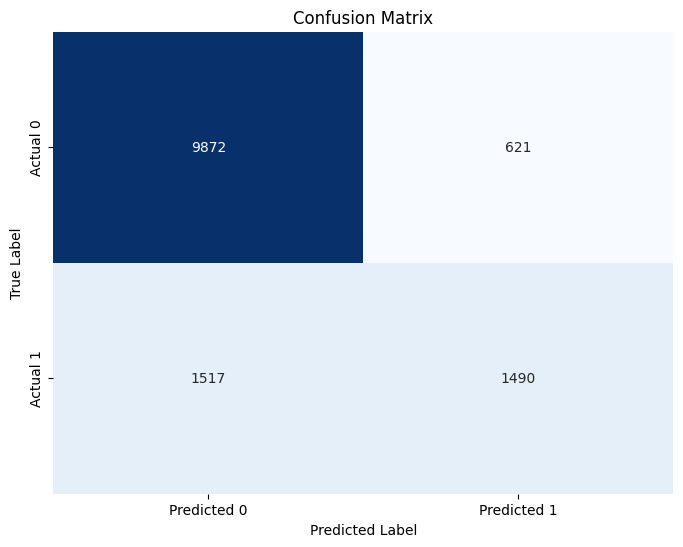

In [ ]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

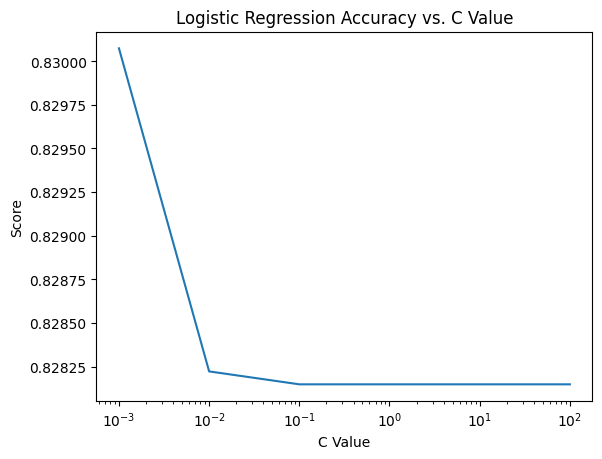

Best Logistic Regression Accuracy: 0.8301
Best C value: 0.001


In [ ]:
from sklearn.linear_model import LogisticRegression

# Create a list to store accuracy scores
scoreListLR = []

# Define a range of C values to test
C_values = [0.001, 0.01, 0.1, 1, 10, 100]

for c in C_values:
    # Initialize Logistic Regression model with different C values
    lr_tuned = LogisticRegression(C=c, random_state=42, solver='liblinear') # Using 'liblinear' solver for smaller datasets and simplicity
    lr_tuned.fit(X_train, y_train)
    scoreListLR.append(lr_tuned.score(X_test, y_test))

# Plot the accuracy scores for different C values
plt.plot(C_values, scoreListLR)
plt.xscale('log') # Use a log scale for C values
plt.xlabel("C Value")
plt.ylabel("Score")
plt.title("Logistic Regression Accuracy vs. C Value")
plt.show()

# Find the best accuracy and the corresponding C value
best_RFAcc = max(scoreListLR)
best_C_value = C_values[scoreListLR.index(best_RFAcc)]

print(f"Best Logistic Regression Accuracy: {best_RFAcc:.4f}")
print(f"Best C value: {best_C_value}")

In [ ]:
rf=RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
rf.score(X_train,y_train)

1.0

In [ ]:
rf.score(X_test,y_test)

0.9284444444444444

Classification report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.95     10493
           1       0.90      0.77      0.83      3007

    accuracy                           0.93     13500
   macro avg       0.92      0.87      0.89     13500
weighted avg       0.93      0.93      0.93     13500

Confusion matrix:
 [[10223   270]
 [  696  2311]]
Random Forest Accuracy:  0.9284444444444444
Random Forest ROC AUC :  0.9728584952085022


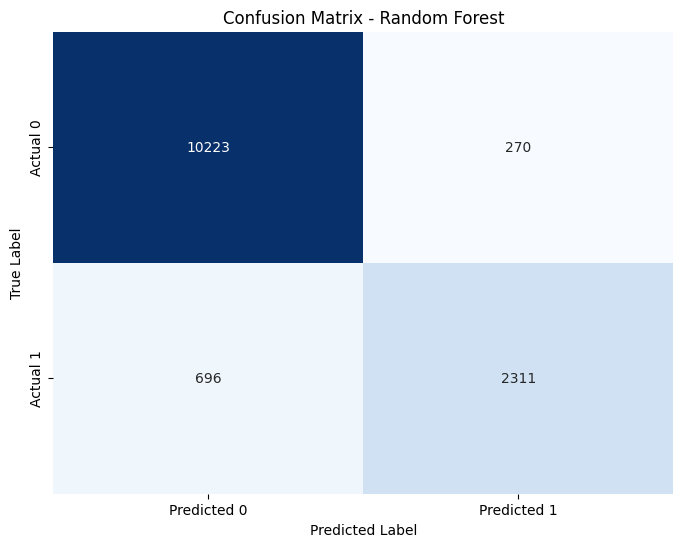

In [ ]:
# Make predictions on the test set
y_pred_rf = rf.predict(X_test)
y_pred_proba_rf = rf.predict_proba(X_test)[:, 1]

# Evaluate the model
print('Classification report:\n', classification_report(y_test, y_pred_rf))
print('Confusion matrix:\n', confusion_matrix(y_test, y_pred_rf))
print("Random Forest Accuracy: ", accuracy_score(y_test, y_pred_rf))
print('Random Forest ROC AUC : ', roc_auc_score(y_test, y_pred_proba_rf))

# Generate and plot the confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Random Forest')
plt.show()

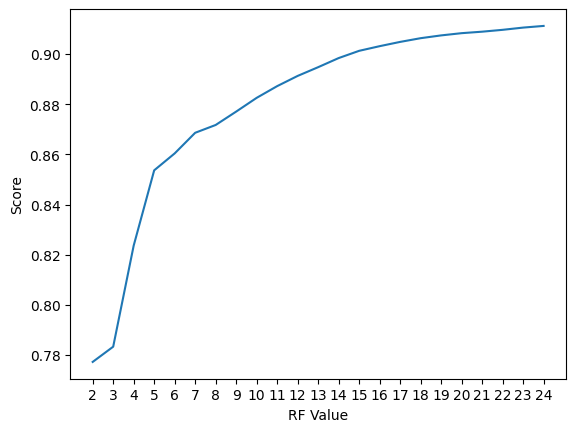

Random Forest Accuracy:  91.12%


In [ ]:
scoreListRF = []
for i in range(2,25):
    RFclassifier = RandomForestClassifier(n_estimators = 1000, random_state = 1, max_leaf_nodes=i)
    RFclassifier.fit(X_train, y_train)
    scoreListRF.append(RFclassifier.score(X_test, y_test))

plt.plot(range(2,25), scoreListRF)
plt.xticks(np.arange(2,25,1))
plt.xlabel("RF Value")
plt.ylabel("Score")
plt.show()
RFAcc = max(scoreListRF)
print("Random Forest Accuracy:  {:.2f}%".format(RFAcc*100))

In [ ]:
# Find the index of the maximum score in scoreListRF
best_index = scoreListRF.index(max(scoreListRF))

# The range starts from 2, so add 2 to the index to get the max_leaf_nodes value
best_max_leaf_nodes = best_index + 2

print(f"The best max_leaf_nodes value is: {best_max_leaf_nodes}")
print(f"The corresponding accuracy is: {max(scoreListRF):.4f}")

The best max_leaf_nodes value is: 10
The corresponding accuracy is: 0.8825


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
knn.score(X_train,y_train)

0.8789523809523809

In [ ]:
knn.score(X_test,y_test)

0.8305925925925925

Classification report:
               precision    recall  f1-score   support

           0       0.87      0.92      0.89     10493
           1       0.66      0.51      0.57      3007

    accuracy                           0.83     13500
   macro avg       0.76      0.71      0.73     13500
weighted avg       0.82      0.83      0.82     13500

Confusion matrix:
 [[9694  799]
 [1488 1519]]
KNN Accuracy:  0.8305925925925925
KNN ROC AUC :  0.8148872808644883


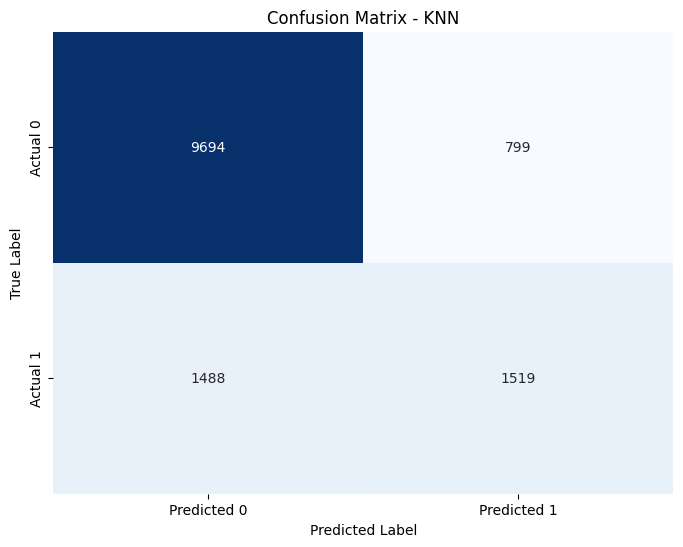

In [ ]:
# Make predictions on the test set
y_pred_knn = knn.predict(X_test)
y_pred_proba_knn = knn.predict_proba(X_test)[:, 1]

# Evaluate the model
print('Classification report:\n', classification_report(y_test, y_pred_knn))
print('Confusion matrix:\n', confusion_matrix(y_test, y_pred_knn))
print("KNN Accuracy: ", accuracy_score(y_test, y_pred_knn))
print('KNN ROC AUC : ', roc_auc_score(y_test, y_pred_proba_knn))

# Generate and plot the confusion matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - KNN')
plt.show()

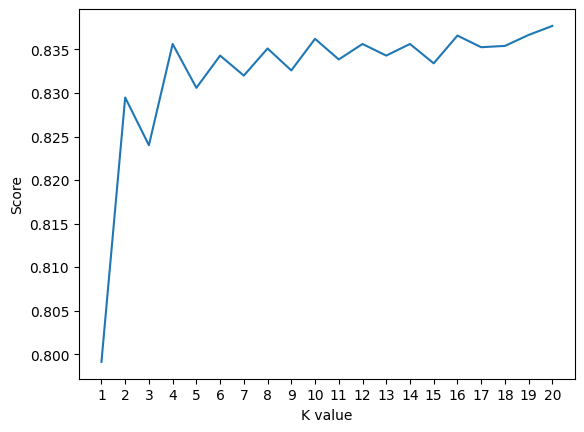

KNN best accuracy: 83.77%


In [ ]:
scoreListknn = []
for i in range(1,21):
    KNclassifier = KNeighborsClassifier(n_neighbors = i)
    KNclassifier.fit(X_train, y_train)
    scoreListknn.append(KNclassifier.score(X_test, y_test))

plt.plot(range(1,21), scoreListknn)
plt.xticks(np.arange(1,21,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()
KNAcc = max(scoreListknn)
print("KNN best accuracy: {:.2f}%".format(KNAcc*100))

In [ ]:
from sklearn.tree import DecisionTreeClassifier

DT=DecisionTreeClassifier()
DT.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
DT.score(X_train,y_train)

1.0

In [ ]:
DT.score(X_test,y_test)

0.8998518518518519

Classification report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94     10493
           1       0.77      0.78      0.78      3007

    accuracy                           0.90     13500
   macro avg       0.86      0.86      0.86     13500
weighted avg       0.90      0.90      0.90     13500

Confusion matrix:
 [[9815  678]
 [ 674 2333]]
Decision Tree Accuracy:  0.8998518518518519
Decision Tree ROC AUC :  0.8556209151548957


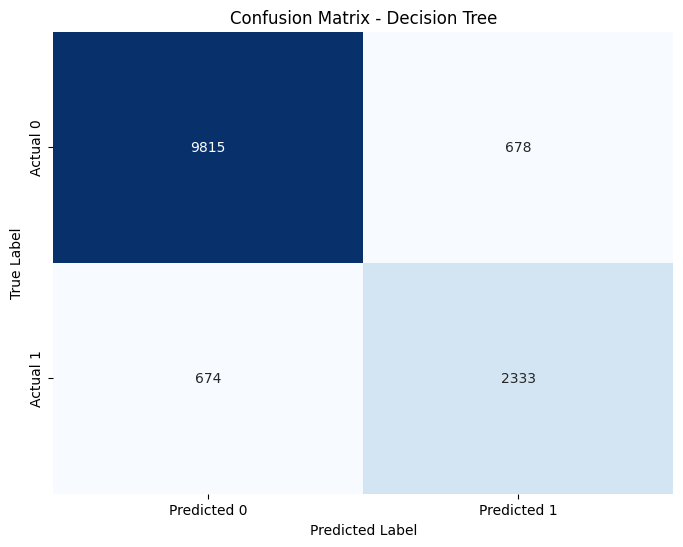

In [ ]:
# Make predictions on the test set
y_pred_dt = DT.predict(X_test)
y_pred_proba_dt = DT.predict_proba(X_test)[:, 1]

# Evaluate the model
print('Classification report:\n', classification_report(y_test, y_pred_dt))
print('Confusion matrix:\n', confusion_matrix(y_test, y_pred_dt))
print("Decision Tree Accuracy: ", accuracy_score(y_test, y_pred_dt))
print('Decision Tree ROC AUC : ', roc_auc_score(y_test, y_pred_proba_dt))

# Generate and plot the confusion matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Decision Tree')
plt.show()

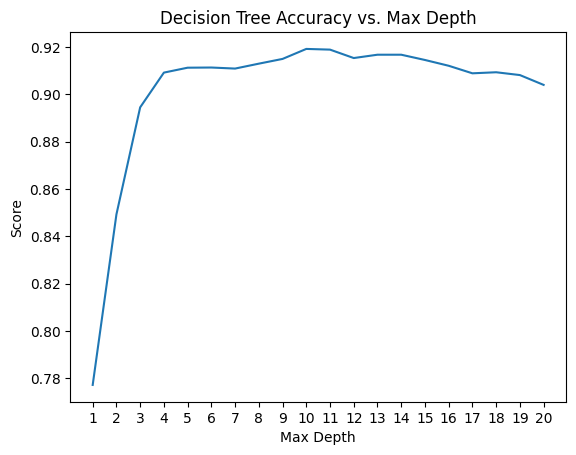

Decision Tree best accuracy: 91.91%


In [ ]:
scoreListDT = []
for i in range(1,21):
    DTclassifier = DecisionTreeClassifier(max_depth = i, random_state = 42)
    DTclassifier.fit(X_train, y_train)
    scoreListDT.append(DTclassifier.score(X_test, y_test))

plt.plot(range(1,21), scoreListDT)
plt.xticks(np.arange(1,21,1))
plt.xlabel("Max Depth")
plt.ylabel("Score")
plt.title("Decision Tree Accuracy vs. Max Depth")
plt.show()
DTAcc = max(scoreListDT)
print("Decision Tree best accuracy: {:.2f}%".format(DTAcc*100))

In [ ]:
import re

# Rename columns to remove invalid characters for XGBoost
X_train.columns = ["".join (c if c.isalnum() else "_" for c in str(x)) for x in X_train.columns]
X_test.columns = ["".join (c if c.isalnum() else "_" for c in str(x)) for x in X_test.columns]

xgb=XGBClassifier()
xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
xgb.score(X_train,y_train)

0.9719047619047619

In [ ]:
xgb.score(X_test,y_test)

0.9322222222222222

Classification report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96     10493
           1       0.88      0.81      0.84      3007

    accuracy                           0.93     13500
   macro avg       0.91      0.89      0.90     13500
weighted avg       0.93      0.93      0.93     13500

Confusion matrix:
 [[10157   336]
 [  579  2428]]
XGBoost Accuracy:  0.9322222222222222
XGBoost ROC AUC :  0.9769710917227952


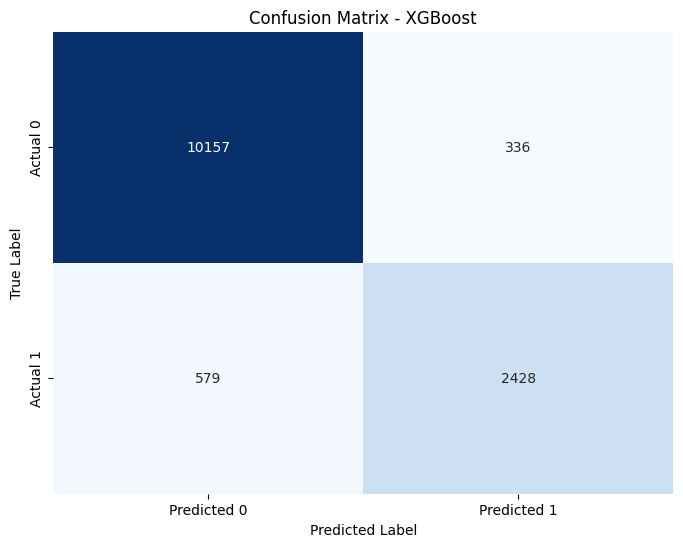

In [ ]:
# Make predictions on the test set
y_pred_xgb = xgb.predict(X_test)
y_pred_proba_xgb = xgb.predict_proba(X_test)[:, 1]

# Evaluate the model
print('Classification report:\n', classification_report(y_test, y_pred_xgb))
print('Confusion matrix:\n', confusion_matrix(y_test, y_pred_xgb))
print("XGBoost Accuracy: ", accuracy_score(y_test, y_pred_xgb))
print('XGBoost ROC AUC : ', roc_auc_score(y_test, y_pred_proba_xgb))

# Generate and plot the confusion matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - XGBoost')
plt.show()

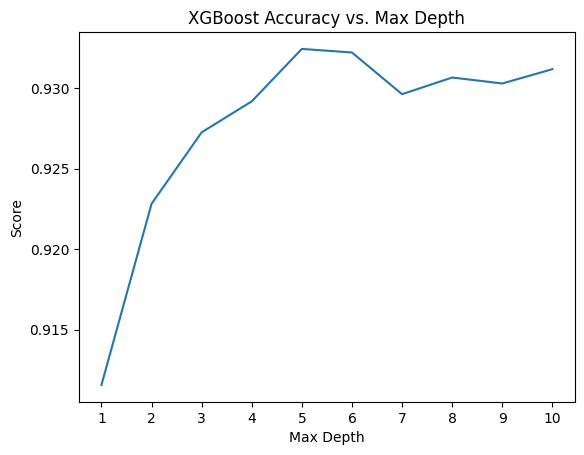

XGBoost best accuracy: 0.93%
Best max_depth for XGBoost: 5


In [ ]:
scoreListXGB = []
# Using a smaller range for max_depth for XGBoost as trees are typically shallower
for i in range(1, 11):
    # Initialize XGBoost classifier with different max_depth
    xgb_tuned = XGBClassifier(max_depth=i, random_state=42, use_label_encoder=False, eval_metric='logloss')
    # We need to rename columns again for each iteration as the original X_train and X_test are used
    X_train_renamed = X_train.copy()
    X_test_renamed = X_test.copy()
    X_train_renamed.columns = ["".join (c if c.isalnum() else "_" for c in str(x)) for x in X_train_renamed.columns]
    X_test_renamed.columns = ["".join (c if c.isalnum() else "_" for c in str(x)) for x in X_test_renamed.columns]

    xgb_tuned.fit(X_train_renamed, y_train)
    scoreListXGB.append(xgb_tuned.score(X_test_renamed, y_test))

plt.plot(range(1, 11), scoreListXGB)
plt.xticks(np.arange(1, 11, 1))
plt.xlabel("Max Depth")
plt.ylabel("Score")
plt.title("XGBoost Accuracy vs. Max Depth")
plt.show()

XGBAcc = max(scoreListXGB)
best_max_depth_xgb = range(1, 11)[scoreListXGB.index(XGBAcc)]

print(f"XGBoost best accuracy: {XGBAcc:.2f}%")
print(f"Best max_depth for XGBoost: {best_max_depth_xgb}")

In [ ]:
from sklearn.naive_bayes import GaussianNB

nbclassifier1=GaussianNB()
nbclassifier1.fit(X_train,y_train)

GaussianNB()

In [ ]:
nbclassifier1.score(X_train,y_train)

0.8071746031746032

In [ ]:
nbclassifier1.score(X_test,y_test)

0.8065185185185185

Classification report:
               precision    recall  f1-score   support

           0       0.82      0.95      0.88     10493
           1       0.64      0.29      0.40      3007

    accuracy                           0.81     13500
   macro avg       0.73      0.62      0.64     13500
weighted avg       0.78      0.81      0.78     13500

Confusion matrix:
 [[10006   487]
 [ 2125   882]]
Gaussian Naive Bayes Accuracy:  0.8065185185185185
Gaussian Naive Bayes ROC AUC :  0.7654199668989266


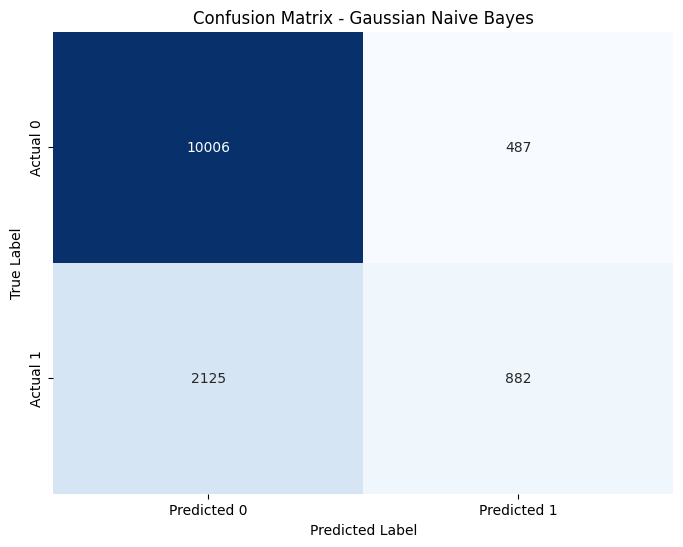

In [ ]:
# Make predictions on the test set
y_pred_nb = nbclassifier1.predict(X_test)
y_pred_proba_nb = nbclassifier1.predict_proba(X_test)[:, 1]

# Evaluate the model
print('Classification report:\n', classification_report(y_test, y_pred_nb))
print('Confusion matrix:\n', confusion_matrix(y_test, y_pred_nb))
print("Gaussian Naive Bayes Accuracy: ", accuracy_score(y_test, y_pred_nb))
print('Gaussian Naive Bayes ROC AUC : ', roc_auc_score(y_test, y_pred_proba_nb))

# Generate and plot the confusion matrix
cm_nb = confusion_matrix(y_test, y_pred_nb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Gaussian Naive Bayes')
plt.show()

In [ ]:
from sklearn.naive_bayes import MultinomialNB

nbclassifier2=MultinomialNB()
nbclassifier2.fit(X_train,y_train)

MultinomialNB()

In [ ]:
nbclassifier2.score(X_train,y_train)

0.6595238095238095

In [ ]:
nbclassifier2.score(X_test,y_test)

0.6545185185185185

Classification report:
               precision    recall  f1-score   support

           0       0.87      0.65      0.75     10493
           1       0.35      0.67      0.46      3007

    accuracy                           0.65     13500
   macro avg       0.61      0.66      0.60     13500
weighted avg       0.76      0.65      0.68     13500

Confusion matrix:
 [[6826 3667]
 [ 997 2010]]
Multinomial Naive Bayes Accuracy:  0.6545185185185185
Multinomial Naive Bayes ROC AUC :  0.667317889187119


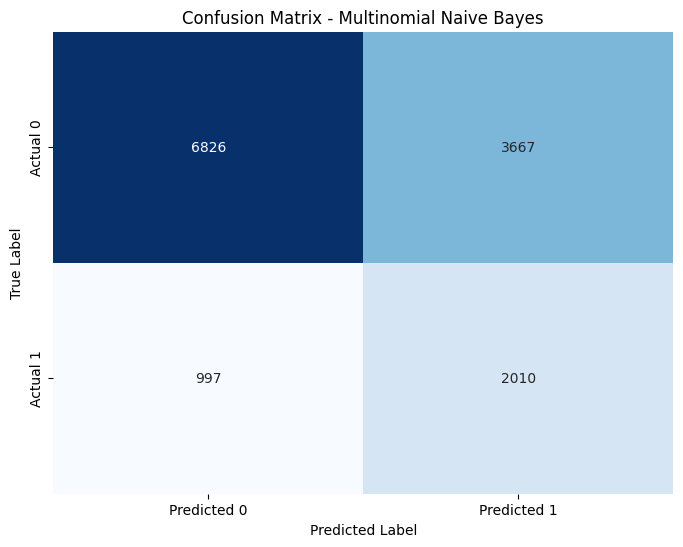

In [ ]:
# Make predictions on the test set
y_pred_mnb = nbclassifier2.predict(X_test)
y_pred_proba_mnb = nbclassifier2.predict_proba(X_test)[:, 1]

# Evaluate the model
print('Classification report:\n', classification_report(y_test, y_pred_mnb))
print('Confusion matrix:\n', confusion_matrix(y_test, y_pred_mnb))
print("Multinomial Naive Bayes Accuracy: ", accuracy_score(y_test, y_pred_mnb))
print('Multinomial Naive Bayes ROC AUC : ', roc_auc_score(y_test, y_pred_proba_mnb))

# Generate and plot the confusion matrix
cm_mnb = confusion_matrix(y_test, y_pred_mnb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_mnb, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Multinomial Naive Bayes')
plt.show()

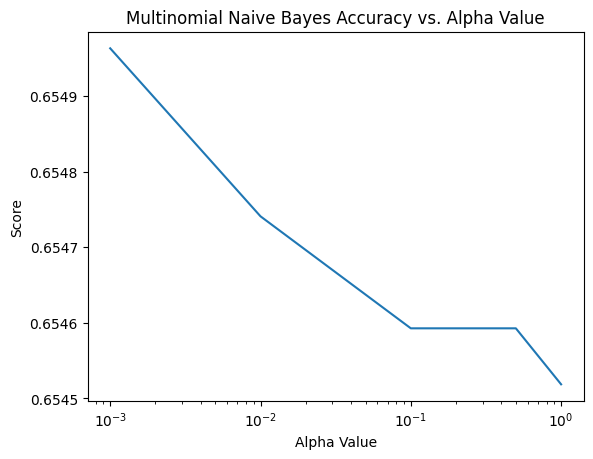

Best Multinomial Naive Bayes Accuracy: 0.6550
Best Alpha value: 0.001


In [ ]:
from sklearn.naive_bayes import MultinomialNB

# Create a list to store accuracy scores
scoreListMNB = []

# Define a range of alpha values to test
alpha_values = [0.001, 0.01, 0.1, 0.5, 1.0]

for alpha in alpha_values:
    # Initialize Multinomial Naive Bayes model with different alpha values
    mnb_tuned = MultinomialNB(alpha=alpha)
    mnb_tuned.fit(X_train, y_train)
    scoreListMNB.append(mnb_tuned.score(X_test, y_test))

# Plot the accuracy scores for different alpha values
plt.plot(alpha_values, scoreListMNB)
plt.xscale('log') # Use a log scale for alpha values
plt.xlabel("Alpha Value")
plt.ylabel("Score")
plt.title("Multinomial Naive Bayes Accuracy vs. Alpha Value")
plt.show()

# Find the best accuracy and the corresponding alpha value
best_MNBAcc = max(scoreListMNB)
best_alpha_value = alpha_values[scoreListMNB.index(best_MNBAcc)]

print(f"Best Multinomial Naive Bayes Accuracy: {best_MNBAcc:.4f}")
print(f"Best Alpha value: {best_alpha_value}")

In [ ]:
from sklearn.naive_bayes import BernoulliNB

nbclassifier3=BernoulliNB()
nbclassifier3.fit(X_train,y_train)

BernoulliNB()

In [ ]:
nbclassifier3.score(X_train,y_train)

0.8238412698412698

In [ ]:
nbclassifier3.score(X_test,y_test)

0.8243703703703704

Classification report:
               precision    recall  f1-score   support

           0       0.90      0.87      0.89     10493
           1       0.60      0.65      0.62      3007

    accuracy                           0.82     13500
   macro avg       0.75      0.76      0.75     13500
weighted avg       0.83      0.82      0.83     13500

Confusion matrix:
 [[9178 1315]
 [1056 1951]]
Bernoulli Naive Bayes Accuracy:  0.8243703703703704
Bernoulli Naive Bayes ROC AUC :  0.8954766461724321


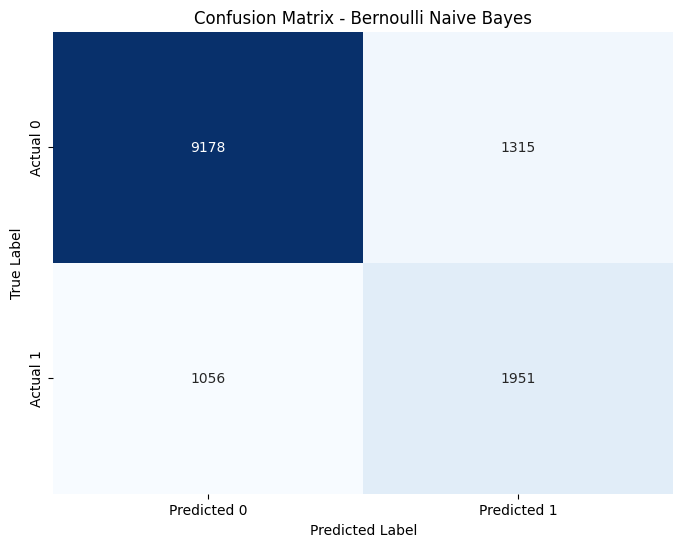

In [ ]:
# Make predictions on the test set
y_pred_bnb = nbclassifier3.predict(X_test)
y_pred_proba_bnb = nbclassifier3.predict_proba(X_test)[:, 1]

# Evaluate the model
print('Classification report:\n', classification_report(y_test, y_pred_bnb))
print('Confusion matrix:\n', confusion_matrix(y_test, y_pred_bnb))
print("Bernoulli Naive Bayes Accuracy: ", accuracy_score(y_test, y_pred_bnb))
print('Bernoulli Naive Bayes ROC AUC : ', roc_auc_score(y_test, y_pred_proba_bnb))

# Generate and plot the confusion matrix
cm_bnb = confusion_matrix(y_test, y_pred_bnb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_bnb, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Bernoulli Naive Bayes')
plt.show()

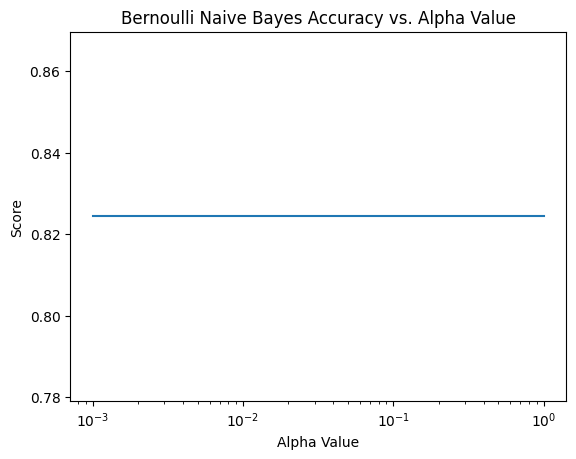

Best Bernoulli Naive Bayes Accuracy: 0.8244
Best Alpha value: 0.001


In [ ]:
# Create a list to store accuracy scores
scoreListBNB = []
# Define a range of alpha values to test
alpha_values = [0.001, 0.01, 0.1, 0.5, 1.0]

for alpha in alpha_values:
    # Initialize Bernoulli Naive Bayes model with different alpha values
    bnb_tuned = BernoulliNB(alpha=alpha)
    bnb_tuned.fit(X_train, y_train)
    scoreListBNB.append(bnb_tuned.score(X_test, y_test))

 # Plot the accuracy scores for different alpha values
plt.plot(alpha_values, scoreListBNB)
plt.xscale('log')

 # Use a log scale for alpha values
plt.xlabel("Alpha Value")
plt.ylabel("Score")
plt.title("Bernoulli Naive Bayes Accuracy vs. Alpha Value")
plt.show()

 # Find the best accuracy and the corresponding alpha value
best_BNBAcc = max(scoreListBNB)
best_alpha_value = alpha_values[scoreListBNB.index(best_BNBAcc)]
print(f"Best Bernoulli Naive Bayes Accuracy: {best_BNBAcc:.4f}")
print(f"Best Alpha value: {best_alpha_value}")

In [ ]:
from sklearn.svm import SVC

svc=SVC()
svc.fit(X_train,y_train)

SVC()

In [ ]:
svc.score(X_train,y_train)

0.8002539682539682

In [ ]:
svc.score(X_test,y_test)

0.7994814814814815

Classification report:
               precision    recall  f1-score   support

           0       0.80      0.99      0.89     10493
           1       0.84      0.12      0.22      3007

    accuracy                           0.80     13500
   macro avg       0.82      0.56      0.55     13500
weighted avg       0.81      0.80      0.74     13500

Confusion matrix:
 [[10422    71]
 [ 2636   371]]
SVC Accuracy:  0.7994814814814815


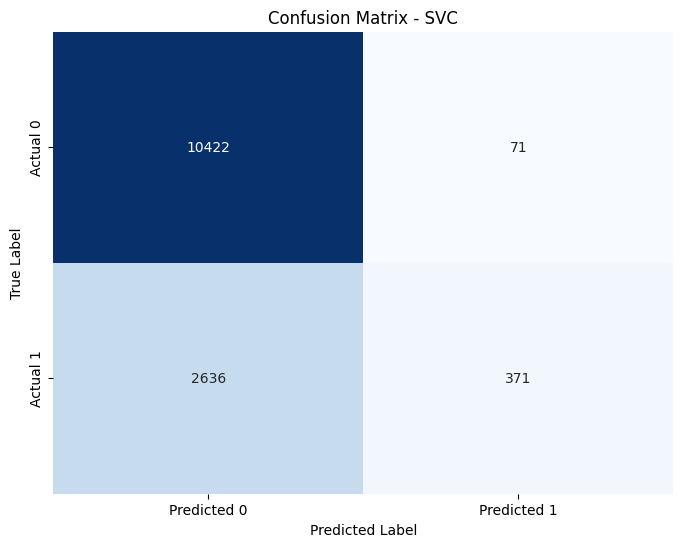

In [ ]:
# Make predictions on the test set
# SVC does not have predict_proba by default, need to set probability=True during initialization
# However, training with probability=True is computationally more expensive
# For a quick evaluation, we can just use predict and evaluate metrics that don't require probabilities
y_pred_svc = svc.predict(X_test)

# Evaluate the model
print('Classification report:\n', classification_report(y_test, y_pred_svc))
print('Confusion matrix:\n', confusion_matrix(y_test, y_pred_svc))
print("SVC Accuracy: ", accuracy_score(y_test, y_pred_svc))

# ROC AUC requires probability predictions, which are not available by default for SVC
# If you need ROC AUC, you would need to train the SVC with probability=True:
# svm_proba = SVC(probability=True)
# svm_proba.fit(X_train, y_train)
# y_pred_proba_svm = svm_proba.predict_proba(X_test)[:, 1]
# print('SVC ROC AUC : ', roc_auc_score(y_test, y_pred_proba_svm))


# Generate and plot the confusion matrix
cm_svm = confusion_matrix(y_test, y_pred_svc)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - SVC')
plt.show()

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(random_state=42)

In [ ]:
# Train the model
gb_classifier.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

Classification report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.95     10493
           1       0.87      0.77      0.82      3007

    accuracy                           0.92     13500
   macro avg       0.90      0.87      0.88     13500
weighted avg       0.92      0.92      0.92     13500

Confusion matrix:
 [[10146   347]
 [  700  2307]]
Gradient Boosting Accuracy:  0.9224444444444444
Gradient Boosting ROC AUC :  0.9710119350157616


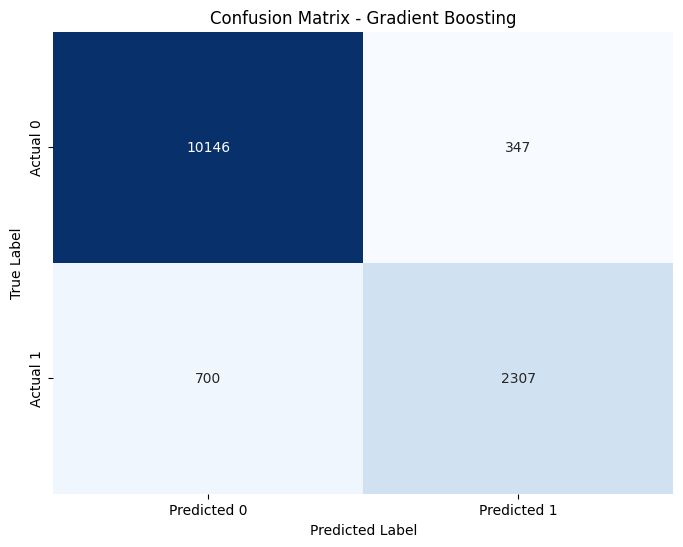

In [ ]:
# Make predictions on the test set
y_pred_gb = gb_classifier.predict(X_test)
y_pred_proba_gb = gb_classifier.predict_proba(X_test)[:, 1]

# Evaluate the model
print('Classification report:\n', classification_report(y_test, y_pred_gb))
print('Confusion matrix:\n', confusion_matrix(y_test, y_pred_gb))
print("Gradient Boosting Accuracy: ", accuracy_score(y_test, y_pred_gb))
print('Gradient Boosting ROC AUC : ', roc_auc_score(y_test, y_pred_proba_gb))

# Generate and plot the confusion matrix
cm_gb = confusion_matrix(y_test, y_pred_gb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_gb, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Gradient Boosting')
plt.show()

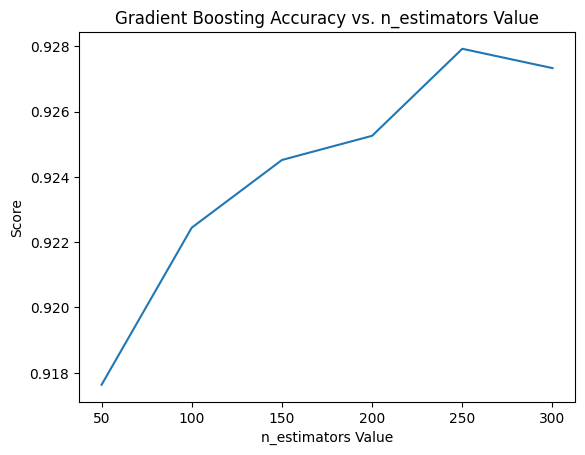

Best Gradient Boosting Accuracy: 0.9279
Best n_estimators value: 250


In [ ]:
# Create a list to store accuracy scores
scoreListGB = []

# Define a range of n_estimators values to test
n_estimators_values = [50, 100, 150, 200, 250, 300]

for n_estimators in n_estimators_values:
    # Initialize Gradient Boosting model with different n_estimators values
    gb_tuned = GradientBoostingClassifier(n_estimators=n_estimators, random_state=42)
    gb_tuned.fit(X_train, y_train)
    scoreListGB.append(gb_tuned.score(X_test, y_test))

# Plot the accuracy scores for different n_estimators values
plt.plot(n_estimators_values, scoreListGB)
# plt.xscale('log') # No need for log scale for n_estimators
plt.xlabel("n_estimators Value")
plt.ylabel("Score")
plt.title("Gradient Boosting Accuracy vs. n_estimators Value")
plt.show()

# Find the best accuracy and the corresponding n_estimators value
best_GBAcc = max(scoreListGB)
best_n_estimators_value = n_estimators_values[scoreListGB.index(best_GBAcc)]

print(f"Best Gradient Boosting Accuracy: {best_GBAcc:.4f}")
print(f"Best n_estimators value: {best_n_estimators_value}")

In [ ]:
# Make predictions on new data using the trained XGBoost model
# Replace 'new_data' with your actual new data in a pandas DataFrame format
# Ensure the new data has the same columns as X_test after one-hot encoding and renaming

# Example of making predictions (replace with your actual new data)
new_data = pd.DataFrame({
    'person_age': [30.0],
    'person_gender': ['male'],
    'person_education': ['Bachelor'],
    'person_income': [50000.0],
    'person_emp_exp': [5],
    'person_home_ownership': ['RENT'],
    'loan_amnt': [10000.0],
    'loan_intent': ['EDUCATION'],
    'loan_int_rate': [10.0],
    'loan_percent_income': [0.2],
    'cb_person_cred_hist_length': [5.0],
    'credit_score': [650],
    'previous_loan_defaults_on_file': ['No'],
    'person_age_group': ['[20.0, 32.4)'] # Need to add the age group column as well
})

# Apply the same preprocessing steps as training data
new_data = pd.get_dummies(new_data, columns=cols_to_encode, drop_first=True)

# Ensure the new data has the same columns as the training data
for col in X_train.columns:
    if col not in new_data.columns:
        new_data[col] = 0

new_data = new_data[X_train.columns]

# Rename columns to match the trained model's expected format
new_data.columns = ["".join (c if c.isalnum() else "_" for c in str(x)) for x in new_data.columns]

# Make predictions
predictions = xgb.predict(new_data)
predictions_proba = xgb.predict_proba(new_data)[:, 1]

print("Predictions:", predictions)
print("Prediction Probabilities (for class 1):", predictions_proba)

Predictions: [0]
Prediction Probabilities (for class 1): [0.10715725]
